In [8]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [10]:
# Importing self-made libaries

import reload_lib as rl
import life_cycle_assessment as lc
import lcia_results as lr
import LCA_plots as lp
import non_bio_co2 as nbc
import standards as s
import LCA_plots_copy as lpc
import import_ecoinvent_and_databases as ied


lib = [lc, lp, lr, nbc, s, lpc, ied]

In [14]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'

ecoinevnt_paths = {'ev391apos' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets",
                   'ev391consq' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets",
                   'ev391cutoff' : r"C:\Users\ruw\Downloads\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets"}
system_path = [r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case1.xlsx', 
                r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case2.xlsx']
rl.reload_lib(lib)

flow_legend, file_name, sheet_name, save_dir, initialization, file_name_unique_process = lc.initilization(path, lcia_method, ecoinevnt_paths, system_path)

Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
You selected to not reload
case1_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_apos
case1_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_consq
case1_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_cut_off
case2_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_apos
case2_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_consq
case2_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_cut_off


In [13]:
initialization['case1_consq']

['single use vs multi use',
 'case1_consq',
 ['H200 REC',
  'H200 SU',
  'H400 REC',
  'H400 SU',
  'alubox (large + dishwasher)',
  'alubox (large + wipe)',
  'alubox (small + dishwasher)',
  'alubox (small + wipe)'],
 'recipe',
 'consq']

In [15]:
rl.reload_lib(lib)

df, plot_x_axis_all, impact_categories, unique = {}, {}, {}, {}
for key, item in initialization.items():
    print(f"Perfoming LCA for {key}")
    # print(file_name_unique_process[key])
    df[key], plot_x_axis_all[key], impact_categories[key] = lr.quick_LCIA(item, file_name[key], file_name_unique_process[key], sheet_name[key])
    print()

Perfoming LCA for case1_apos
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no biogenic', 'acidification: terrestrial', 'terrestrial acidification potential (TAP)') with 29 CFs
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no biogenic', 'climate change', 'global warming potential (GWP1000)') with 151 CFs
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no biogenic', 'ecotoxicity: freshwater', 'freshwater ecotoxicity potential (FETP)') with 1760 CFs
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no biogenic', 'ecotoxicity: marine', 'marine ecotoxicity potential (METP)') with 1760 CFs
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no biogenic', 'ecotoxicity: terrestrial', 'terrestrial ecotoxicity potential (TETP)') with 1757 CFs
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no biogenic', 'energy resources: non-renewable, fossil', 'fossil fuel potential (FFP)') with 6 CFs
New method created: ('ReCiPe 2016 v1.03, midpoint (H) - no bioge

In [16]:
case_keys = [key for key in initialization.keys()]
leg_pos_scaled = {
    'case1' : 0.65,
    'case2' : 0.909
}

leg_pos_gwp = {
    'case1' : 0.652,
    'case2' : 0.652
}

y_min_gwp =  {
    case_keys[0] : -0.6,    #case1 apos
    case_keys[1] : -0.4,    #case1 consq    
    case_keys[2] : -0.6,      #case1 cut off
    case_keys[3] : -0.4,      #case2 apos
    case_keys[4] : -0.2,      #case2 consq
    case_keys[5] : -0.4       #case2 cut off
}

y_max_gwp =  {
    case_keys[0] : 1.8,     #case1 apos
    case_keys[1] : 1.4,     #case1 consq
    case_keys[2] : 1.8,       #case1 cut off
    case_keys[3] : 1.6,       #case2 apos
    case_keys[4] : 1.6,       #case2 consq
    case_keys[5] : 1.6        #case2 cut off
}

y_step_gwp =  {
    case_keys[0] : 0.2,     #case1 apos
    case_keys[1] : 0.2,     #case1 consq
    case_keys[2] : 0.2,     #case1 cut off
    case_keys[3] : 0.2,     #case2 apos
    case_keys[4] : 0.2,     #case2 consq
    case_keys[5] : 0.2      #case2 cut off
}


amount_of_uses = {
    'case1' : 513,
    'case2' : 250
}

y_max_be =  {
    case_keys[0] : [300, 750],  #case1 apos
    case_keys[1] : [250, 650],  #case1 consq
    case_keys[2] : [300, 700],  #case1 cut off
    case_keys[3] : [300, 650],  #case2 apos
    case_keys[4] : [375, 650],  #case2 conqs
    case_keys[5] : [300, 650]   #case2 cut off
}

y_step_be =  {
    case_keys[0] : [25, 50],    #case1 apos
    case_keys[1] : [25, 50],    #case1 consq
    case_keys[2] : [25, 50],    #case1 cut off
    case_keys[3] : [25, 50],    #case2 apos
    case_keys[4] : [25, 50],    #case2 consq
    case_keys[5] : [25, 50]     #case2 cut off
}

x_step_be =  {
    'case1' : 50,
    'case2' : 25
}

break_even_product = {
    'case1' : 'container',
    'case2' : 'electro surgery'
}

plot_structure = [
    leg_pos_scaled,
    leg_pos_gwp,
    y_min_gwp,
    y_max_gwp,
    y_step_gwp,
    amount_of_uses,
    y_max_be,
    y_step_be,
    x_step_be,
    break_even_product
]

In [17]:
# rl.reload_lib(lib)

# lp.create_results_graphs(initialization, df, plot_x_axis_all, save_dir, impact_categories, flow_legend, plot_structure)

In [18]:
cmap = plt.get_cmap('Accent')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

In [19]:
rl.reload_lib(lib)
data = {
    'case1' : {},
    'case2' : {}
}

for key, item in initialization.items():

    database_name = item[1]
    if 'apos' not in database_name:
        if '1' in database_name:
            df_res, plot_x_axis_lst = lc.dataframe_results_handling(df[key], database_name, plot_x_axis_all[key], item[3])
            if type(df_res) is list:
                df_mid, df_endpoint = df_res
                plot_x_axis, plot_x_axis_end = plot_x_axis_lst


            _, df_scaled = lc.dataframe_element_scaling(df_mid)
            df_col = [df_mid.columns[1]]
            df_GWP = df_mid[df_col]

            if 'recipe' in item[3].lower():
                _, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
            
            # inputs = [flow_legend[key], colors, save_dir[key], item[4], database_name]
            columns = lc.unique_elements_list(database_name)
            df_be, ignore = lpc.process_categorizing(df_GWP, database_name, flow_legend[key], columns)

            data['case1'].update({key : [df_scaled, df_scaled_e, df_GWP, df_be]})
        elif '2' in database_name:
            df_res, plot_x_axis_lst = lc.dataframe_results_handling(df[key], database_name, plot_x_axis_all[key], item[3])
            if type(df_res) is list:
                df_mid, df_endpoint = df_res
                plot_x_axis, plot_x_axis_end = plot_x_axis_lst


            _, df_scaled = lc.dataframe_element_scaling(df_mid)
            df_col = [df_mid.columns[1]]
            df_GWP = df_mid[df_col]

            if 'recipe' in item[3].lower():
                _, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
            
            columns = lc.unique_elements_list(database_name)
            df_be, ignore = lpc.process_categorizing(df_GWP, database_name, flow_legend[key], columns)

            # inputs = [flow_legend[key], colors, save_dir[key], item[4], database_name]
            data['case2'].update({key : [df_scaled, df_scaled_e, df_GWP, df_be]})
        # lpc.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories[key])  


In [20]:
rl.reload_lib(lib)
case = 'case1'

folder = s.results_folder(lpc.join_path(path,'results'), case)

case1 already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1


In [21]:
def legend_text(text):
    if '1' in text:
        flow_leg = [
                        'H2I',
                        'H2R',
                        'ASC',
                        'ASW',
                        'H4I',
                        'H4R',
                        'ALC',
                        'ALW'
                        ]
        return flow_leg
    else:
        return ['SUD', 'MUD']
    
def xlim(case, ax1, ax2, columns_to_plot):
    if '2' in case:
        ax1.set_xlim(-0.35, len(columns_to_plot) -0.3)
        ax2.set_xlim(-0.35, len(columns_to_plot) -0.3)
    else:
        ax1.set_xlim(-0.2, len(columns_to_plot))
        ax2.set_xlim(-0.2, len(columns_to_plot))

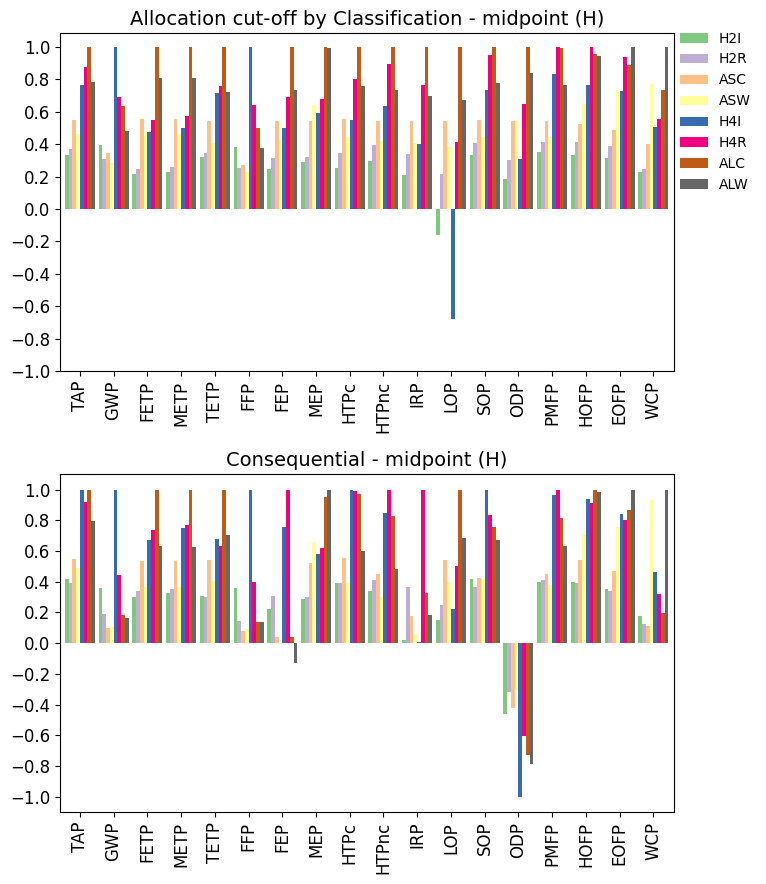

In [22]:
rl.reload_lib(lib)
recipe = 'midpoint (H)'
plt.rcParams.update({
    'font.size': 12,      # General font size
    'axes.titlesize': 14, # Title font size
    'axes.labelsize': 12, # Axis labels font size
    'legend.fontsize': 10 # Legend font size
    }) 

df1 = data[case][f'{case}_cut_off'][0]
df2 = data[case][f'{case}_consq'][0]

# Extract columns and indices for plotting
columns_to_plot = df1.columns
index_list = list(df1.index.values)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9))
bar_width = 1 / (len(index_list) + 1)
index = np.arange(len(columns_to_plot))

# Plot each group of bars
for i, process in enumerate(df1.index):
    values = df1.loc[process, columns_to_plot].values
    color = colors[i % len(colors)]  # Ensure color cycling
    ax1.bar(index + i * bar_width, values, bar_width, label=process, color=color)

for i, process in enumerate(df2.index):
    values = df2.loc[process, columns_to_plot].values
    color = colors[i % len(colors)]  # Ensure color cycling
    ax2.bar(index + i * bar_width, values, bar_width, label=process, color=color)

# Format impact category string

# Set title and labels
ax1.set_title(f"{lpc.plot_title_text('cut')} - {recipe}")  
ax1.set_xticks(index + bar_width * (len(index_list) - 1) / 2)
ax1.set_xticklabels(plot_x_axis, rotation=90)  # Added rotation here
ax1.set_yticks(np.arange(-1, 1 + 0.001, step=0.2))

ax2.set_title(f"{lpc.plot_title_text('consq')} - {recipe}")
ax2.set_xticks(index + bar_width * (len(index_list) - 1) / 2)
ax2.set_xticklabels(plot_x_axis, rotation=90)  # Added rotation here
ax2.set_yticks(np.arange(-1, 1 + 0.001, step=0.2))

xlim(case, ax1, ax2, columns_to_plot)

x_pos = 0.97


fig.legend(
    legend_text(initialization[f'{case}_consq'][1]),
    loc='upper left',
    bbox_to_anchor=(0.965, x_pos),
    ncol= 1,  # Adjust the number of columns based on legend size
    fontsize=10,
    frameon=False
)

# Save the plot with high resolution
output_file = os.path.join(
    folder,
    f'{recipe}_{case}.png'
)
plt.tight_layout()
plt.savefig(output_file, dpi=300, format='png', bbox_inches='tight')
plt.show()

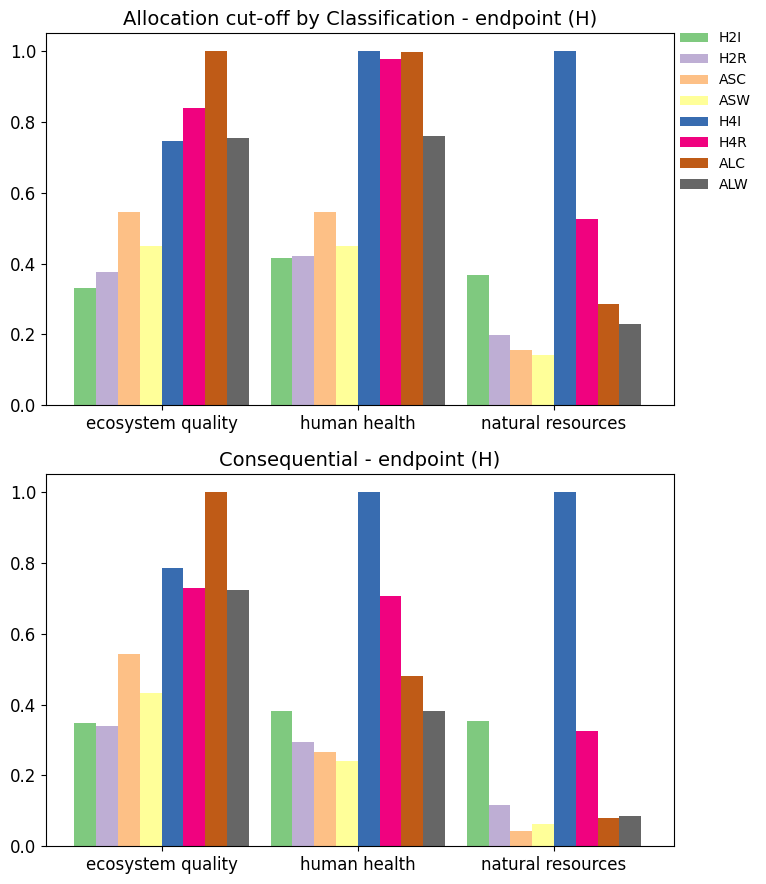

In [23]:
rl.reload_lib(lib)
recipe = 'endpoint (H)'
plt.rcParams.update({
    'font.size': 12,      # General font size
    'axes.titlesize': 14, # Title font size
    'axes.labelsize': 12, # Axis labels font size
    'legend.fontsize': 10 # Legend font size
    }) 

df1 = data[case][f'{case}_cut_off'][1]
df2 = data[case][f'{case}_consq'][1]

# Extract columns and indices for plotting
columns_to_plot = df1.columns
index_list = list(df1.index.values)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9))
bar_width = 1 / (len(index_list) + 1)
index = np.arange(len(columns_to_plot))

# Plot each group of bars
for i, process in enumerate(df1.index):
    values = df1.loc[process, columns_to_plot].values
    color = colors[i % len(colors)]  # Ensure color cycling
    ax1.bar(index + i * bar_width, values, bar_width, label=process, color=color)

for i, process in enumerate(df2.index):
    values = df2.loc[process, columns_to_plot].values
    color = colors[i % len(colors)]  # Ensure color cycling
    ax2.bar(index + i * bar_width, values, bar_width, label=process, color=color)

# Format impact category string

# Set title and labels
ax1.set_title(f"{lpc.plot_title_text('cut')} - {recipe}")  
ax1.set_xticks(index + bar_width * (len(index_list) - 1) / 2)
ax1.set_xticklabels(plot_x_axis_end, rotation=0)  # Added rotation here

ax2.set_title(f"{lpc.plot_title_text('consq')} - {recipe}")
ax2.set_xticks(index + bar_width * (len(index_list) - 1) / 2)
ax2.set_xticklabels(plot_x_axis_end, rotation=0)  # Added rotation here


xlim(case, ax1, ax2, columns_to_plot)

x_pos = 0.97


fig.legend(
    legend_text(initialization[f'{case}_consq'][1]),
    loc='upper left',
    bbox_to_anchor=(0.965, x_pos),
    ncol= 1,  # Adjust the number of columns based on legend size
    fontsize=10,
    frameon=False
)


# Save the plot with high resolution
output_file = os.path.join(
    folder,
    f'{recipe}_{case}.png'
)
plt.tight_layout()
plt.savefig(output_file, dpi=300, format='png', bbox_inches='tight')
plt.show()

In [24]:
rl.reload_lib(lib)

df1gwp = data[case][f'{case}_cut_off'][2]
df2gwp = data[case][f'{case}_consq'][2]

initialization

folder = s.results_folder(lpc.join_path(path,'results'), case)


_, database_name1, _, _, tp = initialization[f'{case}_cut_off']
columns1 = lc.unique_elements_list(database_name1)
df1s, totals_df1 = lpc.process_categorizing(df1gwp, database_name1, flow_legend[f'{case}_cut_off'], columns1)

_, database_name2, _, _, tp = initialization[f'{case}_consq']
columns2 = lc.unique_elements_list(database_name2)
df2s, totals_df2 = lpc.process_categorizing(df2gwp, database_name2, flow_legend[f'{case}_consq'], columns2)

marker_color = 'k'

case1 already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1


In [25]:
def y_min_max(case):
    if '1' in case:
        y_min1 = -0.6
        y_max1 = 1.8
        y_min2 = -0.6
        y_max2 = 1.8

        return y_min1, y_max1, y_min2, y_max2

    else:
        y_min1 = -0.4
        y_max1 = 1.6
        y_min2 = -0.4
        y_max2 = 1.6

        return y_min1, y_max1, y_min2, y_max2

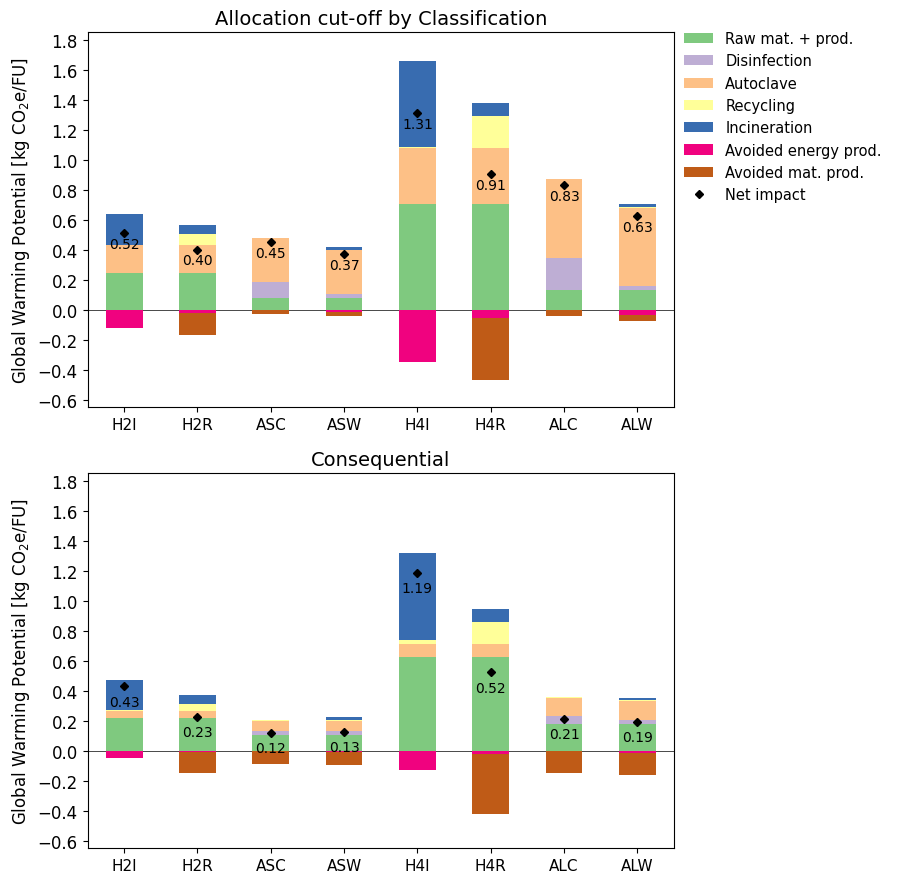

In [26]:
rl.reload_lib(lib)

plt.rcParams.update({
    'font.size': 12,      # General font size
    'axes.titlesize': 14, # Title font size
    'axes.labelsize': 12, # Axis labels font size
    'legend.fontsize': 10 # Legend font size
    }) 



# Extract columns and indices for plotting
columns_to_plot = df1.columns
index_list = list(df1.index.values)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9))

# cut off
df1s.plot(kind='bar', stacked=True, ax=ax1, color=colors, zorder=2, legend=False)
ax1.axhline(y=0, color='k', linestyle='-', zorder=0, linewidth=0.5)
ax1.set_ylabel('Global Warming Potential [kg CO$_2$e/FU]',  fontsize=12)

# Plotting 'Total' values as dots and including it in the legend
for idx, row in totals_df1.iterrows():
    unit = row['Category'][0]
    total = row['Value']
    ax1.plot(unit, total, 'D', color=marker_color, markersize=4, mec='k', label='Net impact' if idx == 0 else "")
    # Add the data value
    ax1.text(
        unit, total - 0.12, f"{total:.2f}", 
        ha='center', va='bottom', fontsize=10, 
        color=marker_color)

# Custom legend with 'Total' included
handles, labels = ax1.get_legend_handles_labels()
handles.append(
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor=marker_color, mec='k', markersize=4, label='Net impact')
)

# CONSQ
df2s.plot(kind='bar', stacked=True, ax=ax2, color=colors, zorder=2, legend=False)
ax2.axhline(y=0, color='k', linestyle='-', zorder=0, linewidth=0.5)
ax2.set_ylabel('Global Warming Potential [kg CO$_2$e/FU]',  fontsize=12)

# Plotting 'Total' values as dots and including it in the legend
for idx, row in totals_df2.iterrows():
    unit = row['Category'][0]
    total = row['Value']
    ax2.plot(unit, total, 'D', color=marker_color, markersize=4, mec='k', label='Net impact' if idx == 0 else "")
    # Add the data value
    ax2.text(
        unit, total - 0.15, f"{total:.2f}", 
        ha='center', va='bottom', fontsize=10, 
        color=marker_color)

# Custom legend with 'Total' included
handles, labels = ax2.get_legend_handles_labels()
handles.append(
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor=marker_color, mec='k', markersize=4, label='Net impact')
)

fig.legend(
    labels=columns1,
    handles=handles,
    loc="upper center",  # Place legend at the bottom center
    bbox_to_anchor=(1.13, 0.97),  # Adjust position to below the x-axis
    ncol=1,  # Display legend entries in 3 columns
    fontsize=10.5,
    frameon=False  # Remove the legend box
)

y_min1, y_max1, y_min2, y_max2 = y_min_max(case)

# Set title, y-ticks, y-limits, and x-tick labels for ax1
ax1.set_title(lpc.plot_title_text('cut'), fontsize=14)
ax1.set_yticks(np.arange(y_min1,y_max1 + 0.01, step=0.2))
ax1.set_ylim(y_min1 - 0.05, y_max1 + 0.05)
ax1.set_xticklabels(legend_text(initialization[f'{case}_cut_off'][1]), rotation=0, fontsize=11)




# Set title, y-ticks, y-limits, and x-tick labels for ax2
ax2.set_title(lpc.plot_title_text('consq'), fontsize=14)
ax2.set_yticks(np.arange(y_min2, y_max2 + 0.01, step=0.2))
ax2.set_ylim(y_min2 - 0.05, y_max2 + 0.05)
ax2.set_xticklabels(legend_text(initialization[f'{case}_consq'][1]), rotation=0, fontsize=11)

plt.tight_layout()

filename = lpc.join_path(folder, f'gwp_{case}.png')
plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')  # Save with 300 dpi resolution
plt.show()

In [27]:
rl.reload_lib(lib)

df1be = data[case][f'{case}_cut_off'][3]
df2be = data[case][f'{case}_consq'][3]

df1be.index = legend_text(initialization[f'{case}_cut_off'][1])
df2be.index = legend_text(initialization[f'{case}_consq'][1])

folder = s.results_folder(lpc.join_path(path,'results'), case)



case1 already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1


In [28]:
def be_case1(df1be, database_name):
    amount_of_uses =513
    df_be_copy = lpc.break_even_orginization(df1be, database_name)
    # Split index into small and large based on criteria
    small_idx = [idx for idx in df_be_copy.index if '2' in idx or 'AS' in idx]
    large_idx = [idx for idx in df_be_copy.index if idx not in small_idx]

    # Create empty DataFrames for each scenario
    scenarios = {
        'small': pd.DataFrame(0, index=small_idx, columns=df_be_copy.columns, dtype=object),
        'large': pd.DataFrame(0, index=large_idx, columns=df_be_copy.columns, dtype=object)
    }
    dct = {}
    # Fill scenarios with data
    for sc_idx, (scenario_name, scenario_df) in enumerate(scenarios.items()):
        scenario_df.update(df_be_copy.loc[scenario_df.index])

        use_cycle, production = {}, {}

        for idx, row in scenario_df.iterrows(): 
            use, prod = 0, 0
            for col in df_be_copy.columns:
                if ('autoclave' in col.lower() or 'disinfection' in col.lower()) and 'H' not in idx:
                    use_cycle[idx] = row[col] + use
                    use += row[col]
                elif 'A' in idx:
                    # print(idx, col ,(row[col] + prod) * amount_of_uses)
                    production[idx] = (row[col] + prod) * amount_of_uses
                    prod += row[col]
                    
                else:
                    production[idx] = row[col] + prod
                    prod += row[col]
        
        # Calculate break-even values
        be_dct = {}
        for key, usage in production.items():
                be_dct[key] = []
                for u in range(1, amount_of_uses + 1):
                    # if u == 1:
                    #     be_dct[key].append(usage)
                    # else:
                    be_dct[key].append(use_cycle.get(key, usage) * u + usage)
                    
        dct[scenario_name] = be_dct
    return dct

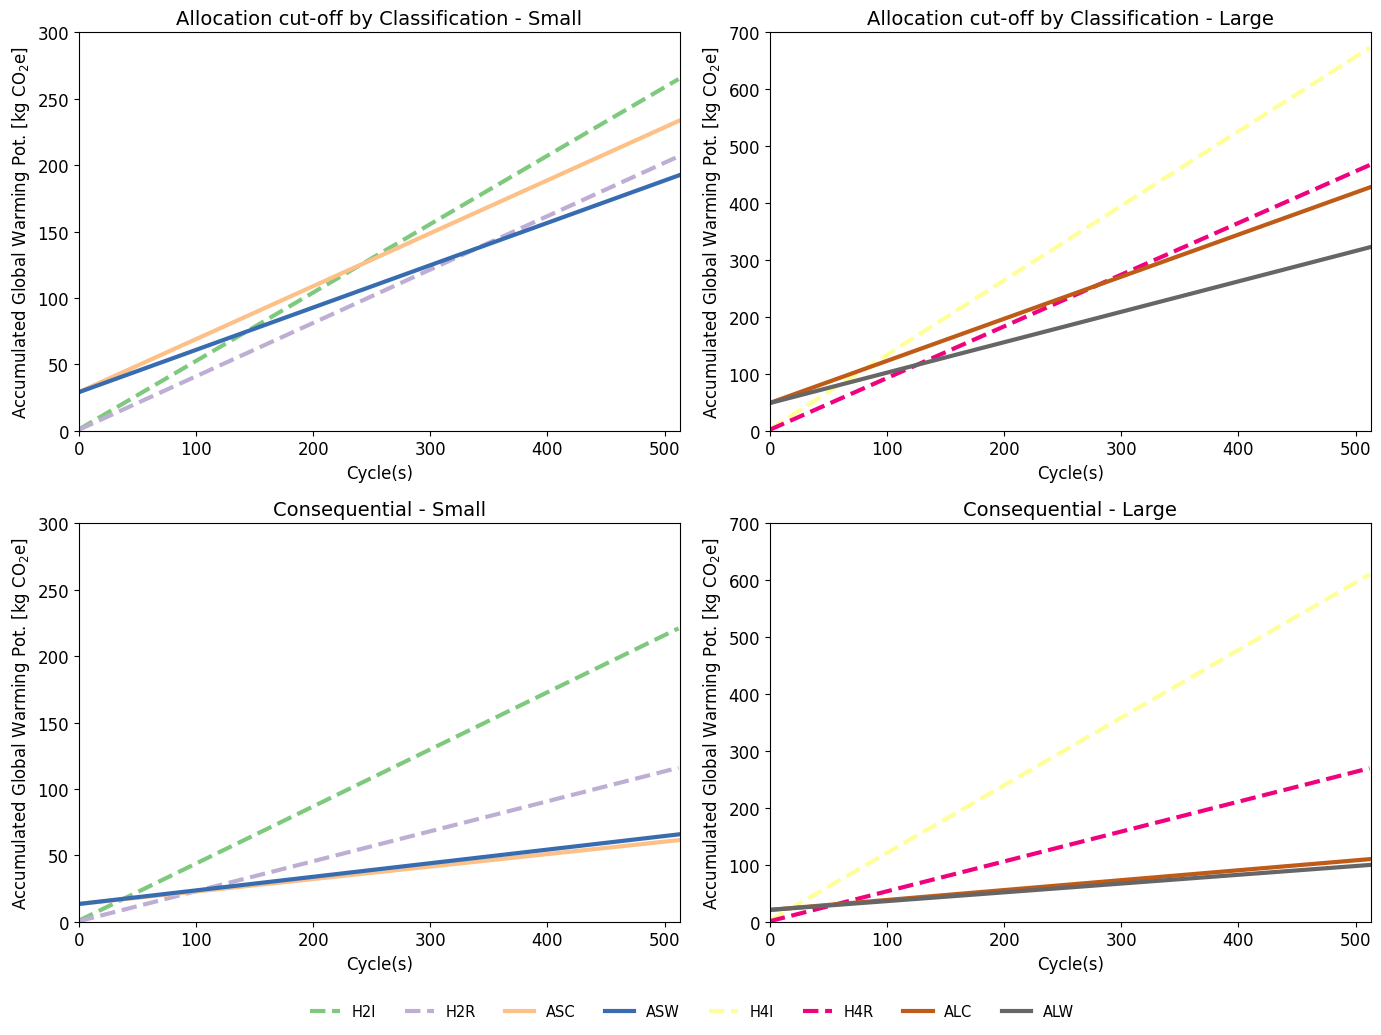

In [29]:
if '1' in case:
    # Plot results
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    ax1 = axs[0, 0]
    ax2 = axs[0, 1]
    ax3 = axs[1, 0]
    ax4 = axs[1, 1]

    color_idxs = [0, 1, 2, 4]
    color_idxl = [3, 5, 6, 7]

    be1 = be_case1(df1be, database_name1)
    s1 = be1['small']
    l1 = be1['large']

    # cut off
    for idx, (key, value) in enumerate(s1.items()):
        try:
            if 'H' in key:
                ax1.plot(value, label=key, linestyle='dashed', color=colors[color_idxs[idx] % len(colors)], linewidth=3)
            else:
                ax1.plot(value, label=key, color=colors[color_idxs[idx]], linewidth=3)
        except IndexError:
            print(f'Color index of {color_idxs[idx]} is out of range, choose a value between 0 and {len(colors) - 1}')

    for idx, (key, value) in enumerate(l1.items()):
        try:
            if 'H' in key:
                ax2.plot(value, label=key, linestyle='dashed', color=colors[color_idxl[idx] % len(colors)], linewidth=3)
            else:
                ax2.plot(value, label=key, color=colors[color_idxl[idx]], linewidth=3)
        except IndexError:
            print(f'Color index of {color_idxl[idx]} is out of range, choose a value between 0 and {len(colors) - 1}')

    # consq
    be2 = be_case1(df2be, database_name1)
    s2 = be2['small']
    l2 = be2['large']

    for idx, (key, value) in enumerate(s2.items()):
        try:
            if 'H' in key:
                ax3.plot(value, label=key, linestyle='dashed', color=colors[color_idxs[idx] % len(colors)], linewidth=3)
            else:
                ax3.plot(value, label=key, color=colors[color_idxs[idx]], linewidth=3)
        except IndexError:
            print(f'Color index of {color_idxs[idx]} is out of range, choose a value between 0 and {len(colors) - 1}')

    for idx, (key, value) in enumerate(l2.items()):
        try:
            if 'H' in key:
                ax4.plot(value, label=key, linestyle='dashed', color=colors[color_idxl[idx] % len(colors)], linewidth=3)
            else:
                ax4.plot(value, label=key, color=colors[color_idxl[idx]], linewidth=3)
        except IndexError:
            print(f'Color index of {color_idxl[idx]} is out of range, choose a value between 0 and {len(colors) - 1}')

    # Create custom legend handles and labels
    handles = []
    labels = []

    for idx, key in enumerate(s1.keys()):
        handles.append(plt.Line2D([0], [0], color=colors[color_idxs[idx]], linewidth=3, linestyle='dashed' if 'H' in key else 'solid'))
        labels.append(key)

    for idx, key in enumerate(l1.keys()):
        handles.append(plt.Line2D([0], [0], color=colors[color_idxl[idx]], linewidth=3, linestyle='dashed' if 'H' in key else 'solid'))
        labels.append(key)

    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0), ncol=8, fontsize=10.5, frameon=False)

    ax1.set_title(f"{lpc.plot_title_text('cut')} - Small")
    ax2.set_title(f"{lpc.plot_title_text('cut')} - Large")
    ax3.set_title(f"{lpc.plot_title_text('consq')} - Small")
    ax4.set_title(f"{lpc.plot_title_text('consq')} - Large")

    ax1.set_xlabel('Cycle(s)')
    ax2.set_xlabel('Cycle(s)')
    ax3.set_xlabel('Cycle(s)')
    ax4.set_xlabel('Cycle(s)')

    ax1.set_ylabel('Accumulated Global Warming Pot. [kg CO$_2$e]')
    ax2.set_ylabel('Accumulated Global Warming Pot. [kg CO$_2$e]')
    ax3.set_ylabel('Accumulated Global Warming Pot. [kg CO$_2$e]')
    ax4.set_ylabel('Accumulated Global Warming Pot. [kg CO$_2$e]')

    ax1.set_xlim(0, 513)
    ax2.set_xlim(0, 513)
    ax3.set_xlim(0, 513)
    ax4.set_xlim(0, 513)

    ax1.set_ylim(0, 300)
    ax2.set_ylim(0, 700)
    ax3.set_ylim(0, 300)
    ax4.set_ylim(0, 700)

    ax1.set_yticks(range(0, 300 + 5, 50))
    ax2.set_yticks(range(0, 700 + 5, 100))
    ax3.set_yticks(range(0, 300 + 5, 50))
    ax4.set_yticks(range(0, 700 + 5, 100))

    # Adjust layout to add a 0.5 cm gap between the figures
    plt.subplots_adjust(hspace=0.6 / 2.54)  # 0.5 cm gap converted to inches

    plt.tight_layout()

    # Save and display plot
    filename = lpc.join_path(folder, f'break_even_{case}.png')
    plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')  # Save with 300 dpi resolution
    plt.show()


In [30]:
def be_case2(df_be):
    amount_of_uses = 250
    multi_use, production = {}, {}
    for idx, row in df_be.iterrows(): 
        use, prod = 0, 0
        for col in df_be.columns:
            if 'Disinfection' in col and 'SUD' not in idx:
                multi_use[idx] = row[col] + use
                use += row[col]
            elif 'MUD' in idx:

                production[idx] = (row[col] + prod) * amount_of_uses
                prod += row[col]
            else:
                production[idx] = row[col] + prod
                prod += row[col]

    # Calculate break-even values
    be_dct = {}
    for key, usage in production.items():
        be_dct[key] = []
        for u in range(1, amount_of_uses + 1):
            # if u == 1:
            #     be_dct[key].append(usage)
            # else:
            be_dct[key].append(multi_use.get(key, usage) * u + usage)
        
    return be_dct

In [31]:
if '2' in case:

    color_idx = [0, 1, 2, 4]
    df1be = data[case][f'{case}_cut_off'][3]
    df2be = data[case][f'{case}_consq'][3]
    dfbe1 = be_case2(df1be)
    dfbe2 = be_case2(df2be)

    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))

    for idx, (key, value) in enumerate(dfbe1.items()):
        try:
            if 'RMD' in key or 'SUD' in key:
                ax1.plot(value, label=key, linestyle='dashed', color=colors[color_idx[idx] % len(colors)], linewidth=3)
            else:
                ax1.plot(value, label=key, color=colors[color_idx[idx]], linewidth=3)
        except IndexError:
            print(f'Color index of {color_idx[idx]} is out of range, choose a value between 0 and {len(colors) - 1}')

    for idx, (key, value) in enumerate(dfbe2.items()):
        try:
            if 'RMD' in key or 'SUD' in key:
                ax2.plot(value, label=key, linestyle='dashed', color=colors[color_idx[idx] % len(colors)], linewidth=3)
            else:
                ax2.plot(value, label=key, color=colors[color_idx[idx]], linewidth=3)
        except IndexError:
            print(f'Color index of {color_idx[idx]} is out of range, choose a value between 0 and {len(colors) - 1}')

    # Create custom legend handles and labels
    handles = []
    labels = []

    for idx, key in enumerate(dfbe1.keys()):
        handles.append(plt.Line2D([0], [0], color=colors[color_idx[idx]], linewidth=3, linestyle='dashed' if 'H' in key else 'solid'))
        labels.append(key)

    # Customize plot
    fig.legend(
        handles,
        labels,
        loc="upper center",  # Place legend at the bottom center
        bbox_to_anchor=(0.97, 0.89),  # Adjust position to below the x-axis
        ncol=1,  # Display legend entries in 3 columns
        fontsize=10.5,
        frameon=False  # Remove the legend box
    )

    ax1.set_title(f"{lpc.plot_title_text('cut')}")
    ax2.set_title(f"{lpc.plot_title_text('consq')}")
    ax1.set_xlabel('Cycle(s)\n')
    ax2.set_xlabel('Cycle(s)')

    ax1.set_ylabel('Accumulated Global Warming Pot. [kg CO$_2$e]')
    ax2.set_ylabel('Accumulated Global Warming Pot. [kg CO$_2$e]')

    ax1.set_xlim(0, 250)
    ax2.set_xlim(0, 250)

    ax1.set_ylim(0, 355)
    ax2.set_ylim(0, 355)

    ax1.set_yticks(range(0, 400 + 5, 50))
    ax2.set_yticks(range(0, 400 + 5, 50))


    # Adjust layout to add a 0.5 cm gap between the figures
    plt.subplots_adjust(hspace=0.6 / 2.54)  # 0.5 cm gap converted to inches

    # Save and display plot
    filename = lpc.join_path(folder, f'break_even_{case}.png')
    plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')  # Save with 300 dpi resolution
    plt.show()


In [32]:
lr.break_even_dataframe(path)

AttributeError: module 'lcia_results' has no attribute 'break_even_dataframe'